In [8]:
import pandas as pd

df = pd.read_csv("Spam_prediction.csv")

In [9]:
df.head()

word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.70               0.00           0.70           0.0   
1            0.00               0.00           0.00           0.0   
2            0.00               0.00           0.00           0.0   
3            1.88               0.00           0.00           0.0   
4            0.07               0.07           0.07           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.00             0.0              0.00                0.00   
1           0.00             0.0              0.00                0.00   
2           0.00             0.0              0.45                0.91   
3           0.00             0.0              0.00                0.00   
4           0.14             0.0              0.00                0.43   

   word_freq_order  word_freq_mail  ...  char_freq_%3B  char_freq_%28  \
0             0.00            0.00  ...          0.000          0.000   
1             0.00            0.00  ...          0.000          0.000   
2             0.45            0.91  ...          0.000          0.254   
3             0.00            0.00  ...          0.000          0.168   
4             0.00            0.00  ...          0.056          0.094   

   char_freq_%5B  char_freq_%21  char_freq_%24  char_freq_%23  \
0            0.0          0.105          0.000          0.000   
1            0.0          0.000          0.000          0.000   
2            0.0          0.063          0.127          0.000   
3            0.0          0.112          0.000          0.056   
4            0.0          0.000          0.028          0.000   

   capital_run_length_average  capital_run_length_longest  \
0                       2.342                          47   
1                       1.000                           1   
2                       4.735                          46   
3                       2.933                          23   
4                       2.394                          24   

   capital_run_length_total  Spam  
0                        89     0  
1                         4     0  
2                       161     1  
3                       311     0  
4                       881     0  

[5 rows x 58 columns]

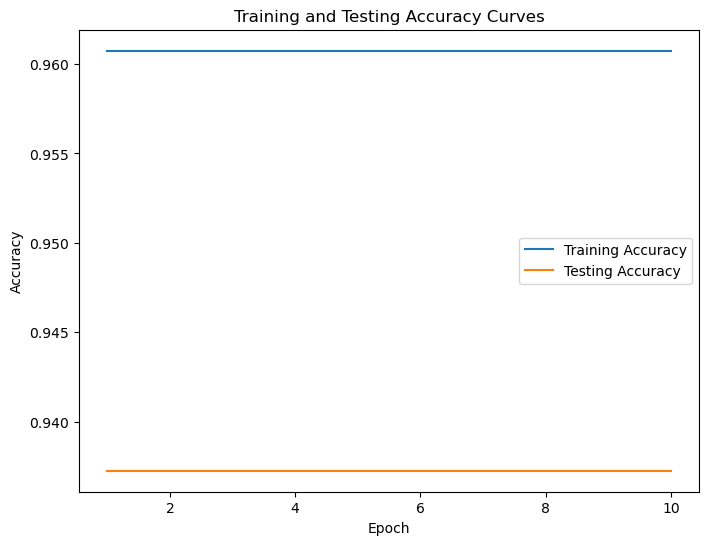

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve, roc_curve, auc

# Assuming 'df' is your DataFrame
X = df.drop("Spam", axis=1)
y = df["Spam"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)

# Lists to store accuracy values
train_accuracy_list = []
test_accuracy_list = []

# Train the model for multiple epochs
epochs = 10
for epoch in range(epochs):
    model.fit(X_train_scaled, y_train)

    # Make predictions on the training set
    y_train_pred = model.predict(X_train_scaled)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracy_list.append(train_accuracy)

    # Make predictions on the test set
    y_test_pred = model.predict(X_test_scaled)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracy_list.append(test_accuracy)

# Plot training and testing accuracy curves
plt.figure(figsize=(8, 6))
plt.plot(range(1, epochs + 1), train_accuracy_list, label='Training Accuracy')
plt.plot(range(1, epochs + 1), test_accuracy_list, label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy Curves')
plt.legend()
plt.show()


Accuracy: 0.9372549019607843
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       147
           1       0.98      0.87      0.92       108

    accuracy                           0.94       255
   macro avg       0.95      0.93      0.93       255
weighted avg       0.94      0.94      0.94       255

Confusion Matrix:
 [[145   2]
 [ 14  94]]


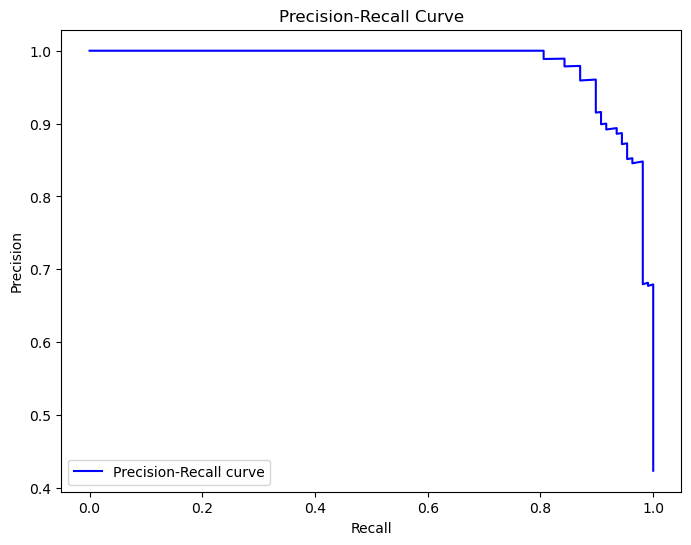

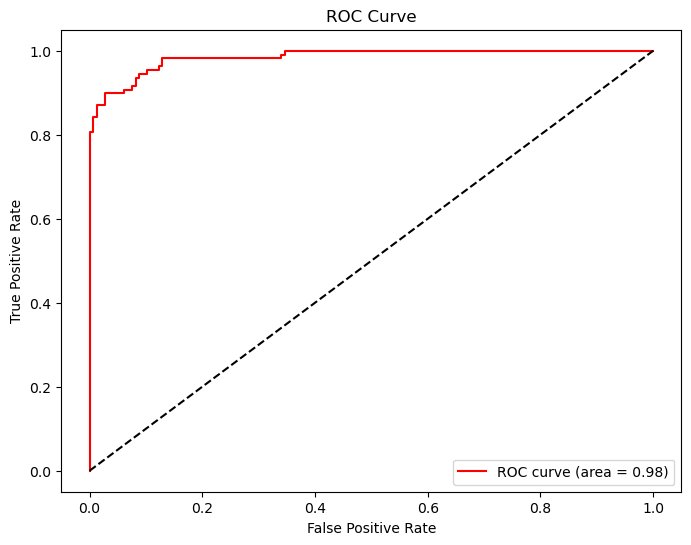

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve, roc_curve, auc

# Assuming 'df' is your DataFrame
X = df.drop("Spam", axis=1)
y = df["Spam"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, model.decision_function(X_test_scaled))
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, model.decision_function(X_test_scaled))
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Epoch 1/10
32/32 [==============================] - 3s 24ms/step - loss: 0.6182 - accuracy: 0.6928 - val_loss: 0.5105 - val_accuracy: 0.8078
Epoch 2/10
32/32 [==============================] - 0s 9ms/step - loss: 0.4055 - accuracy: 0.8665 - val_loss: 0.3777 - val_accuracy: 0.8784
Epoch 3/10
32/32 [==============================] - 0s 13ms/step - loss: 0.3228 - accuracy: 0.9028 - val_loss: 0.3135 - val_accuracy: 0.9059
Epoch 4/10
32/32 [==============================] - 0s 9ms/step - loss: 0.2763 - accuracy: 0.9107 - val_loss: 0.2781 - val_accuracy: 0.9137
Epoch 5/10
32/32 [==============================] - 0s 8ms/step - loss: 0.2451 - accuracy: 0.9195 - val_loss: 0.2543 - val_accuracy: 0.9255
Epoch 6/10
32/32 [==============================] - 0s 4ms/step - loss: 0.2216 - accuracy: 0.9284 - val_loss: 0.2372 - val_accuracy: 0.9255
Epoch 7/10
32/32 [==============================] - 0s 5ms/step - loss: 0.2032 - accuracy: 0.9342 - val_loss: 0.2236 - val_accuracy: 0.9255
Epoch 8/10
32/32 [

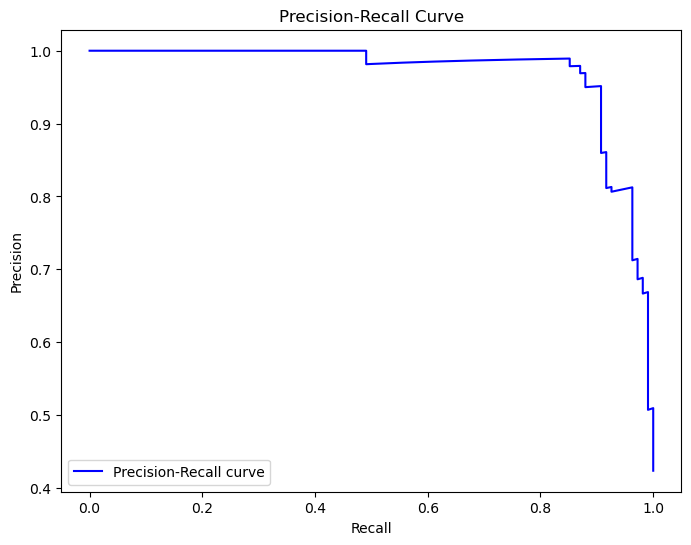

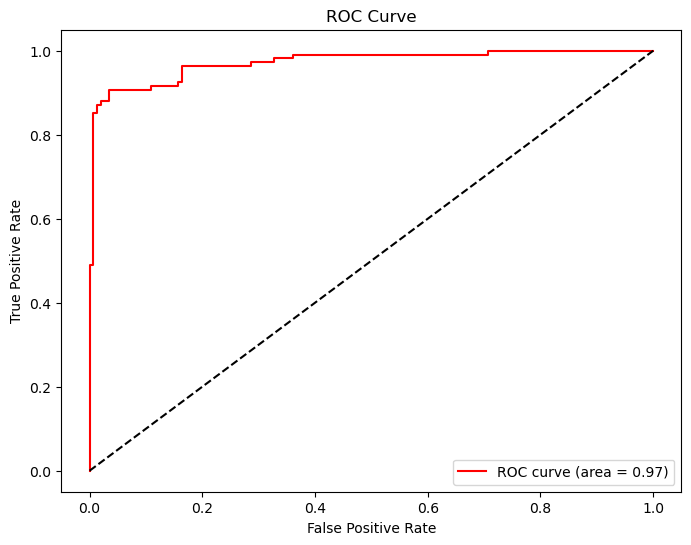

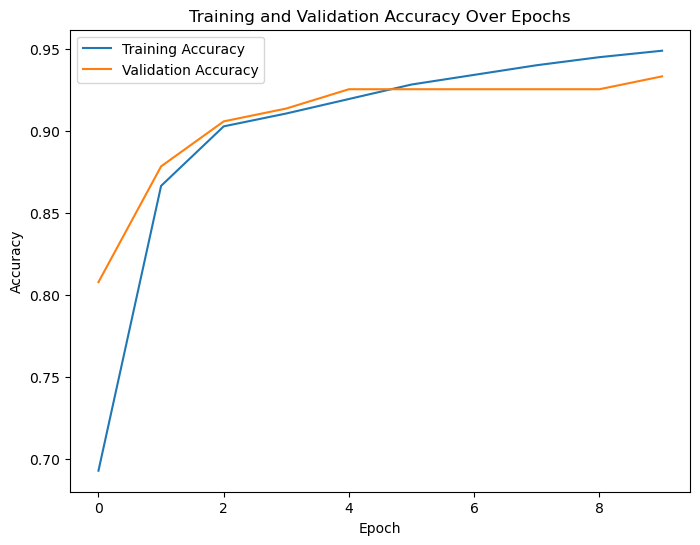

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming 'df' is your DataFrame
X = df.drop("Spam", axis=1)
y = df["Spam"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a simple neural network model
model = Sequential()
model.add(Dense(32, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)
y_pred_binary = (y_pred > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_binary)
report = classification_report(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Plot training and validation accuracy over epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()
plt.show()


SVM Accuracy: 0.9254901960784314
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       147
           1       0.98      0.84      0.91       108

    accuracy                           0.93       255
   macro avg       0.94      0.91      0.92       255
weighted avg       0.93      0.93      0.92       255

SVM Confusion Matrix:
 [[145   2]
 [ 17  91]]


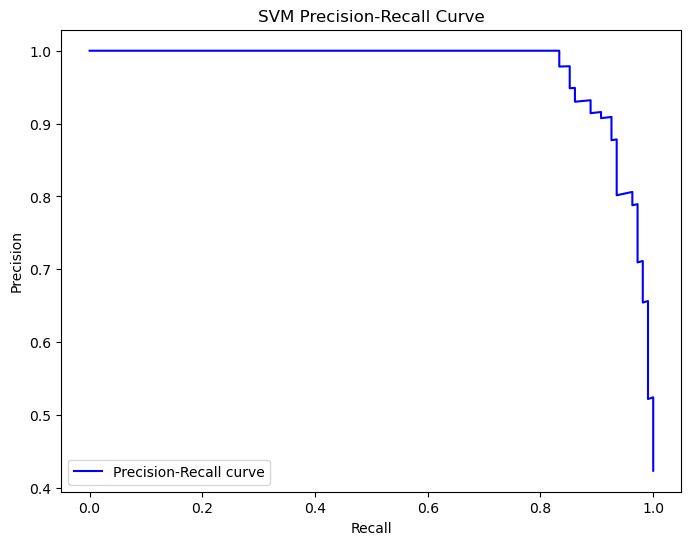

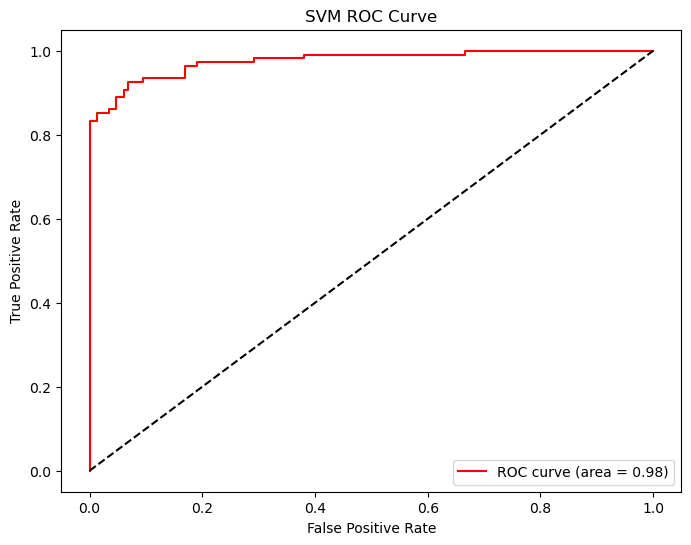

In [13]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
X = df.drop("Spam", axis=1)
y = df["Spam"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the SVM model
svm_model = SVC(probability=True)
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test_scaled)
y_prob_svm = svm_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

print(f"SVM Accuracy: {accuracy_svm}")
print("SVM Classification Report:\n", report_svm)
print("SVM Confusion Matrix:\n", conf_matrix_svm)

# Precision-Recall Curve
precision_svm, recall_svm, _ = precision_recall_curve(y_test, y_prob_svm)
plt.figure(figsize=(8, 6))
plt.plot(recall_svm, precision_svm, color='blue', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('SVM Precision-Recall Curve')
plt.legend()
plt.show()

# ROC Curve
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='red', label='ROC curve (area = {:.2f})'.format(roc_auc_svm))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve')
plt.legend()
plt.show()


SGDClassifier Accuracy: 0.9294117647058824
SGDClassifier Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       147
           1       0.94      0.89      0.91       108

    accuracy                           0.93       255
   macro avg       0.93      0.92      0.93       255
weighted avg       0.93      0.93      0.93       255

SGDClassifier Confusion Matrix:
 [[141   6]
 [ 12  96]]


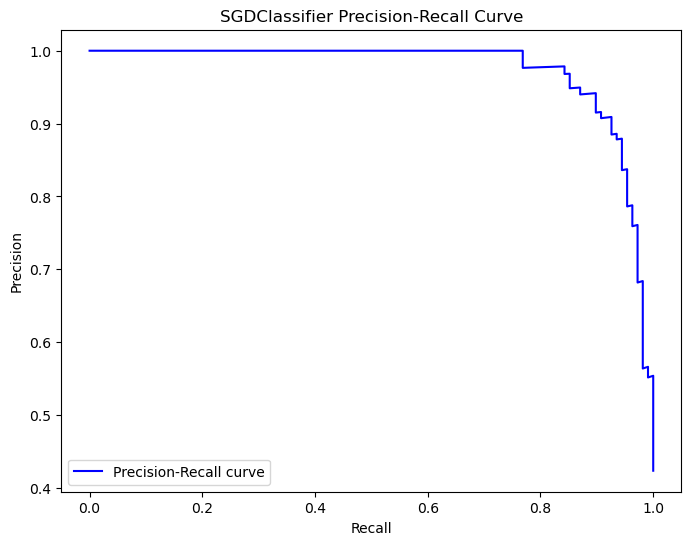

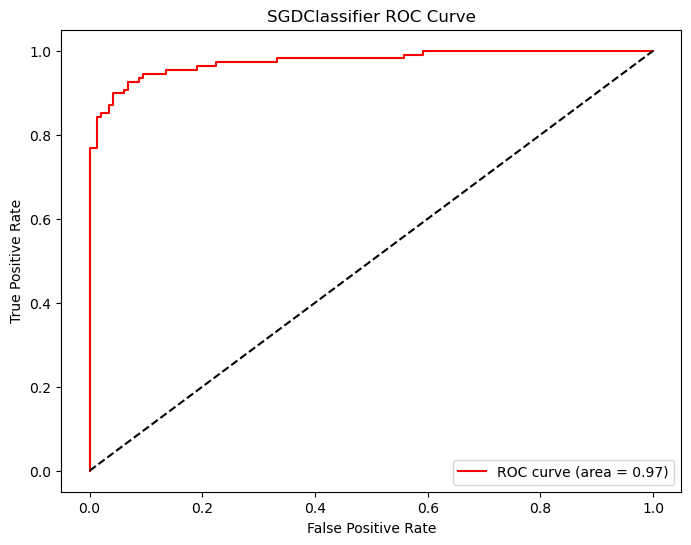

In [14]:
from sklearn.linear_model import SGDClassifier

# Initialize and train the SGDClassifier (Logistic Regression)
sgd_model = SGDClassifier(loss='log_loss', max_iter=1000, random_state=42)
sgd_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_sgd = sgd_model.predict(X_test_scaled)
y_prob_sgd = sgd_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
report_sgd = classification_report(y_test, y_pred_sgd)
conf_matrix_sgd = confusion_matrix(y_test, y_pred_sgd)

print(f"SGDClassifier Accuracy: {accuracy_sgd}")
print("SGDClassifier Classification Report:\n", report_sgd)
print("SGDClassifier Confusion Matrix:\n", conf_matrix_sgd)

# Precision-Recall Curve
precision_sgd, recall_sgd, _ = precision_recall_curve(y_test, y_prob_sgd)
plt.figure(figsize=(8, 6))
plt.plot(recall_sgd, precision_sgd, color='blue', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('SGDClassifier Precision-Recall Curve')
plt.legend()
plt.show()

# ROC Curve
fpr_sgd, tpr_sgd, _ = roc_curve(y_test, y_prob_sgd)
roc_auc_sgd = auc(fpr_sgd, tpr_sgd)
plt.figure(figsize=(8, 6))
plt.plot(fpr_sgd, tpr_sgd, color='red', label='ROC curve (area = {:.2f})'.format(roc_auc_sgd))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SGDClassifier ROC Curve')
plt.legend()
plt.show()


Final SGDClassifier Training Accuracy: 0.9538763493621197
Final SGDClassifier Testing Accuracy: 0.9294117647058824


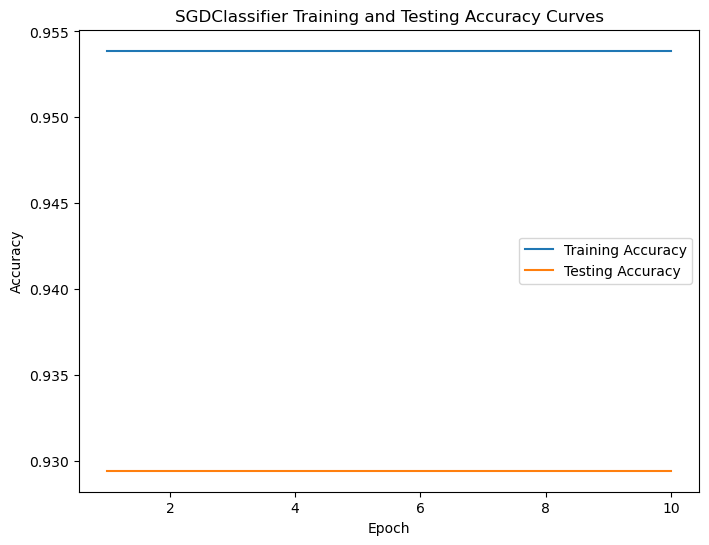

In [23]:
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Assuming 'df' is your DataFrame
X = df.drop("Spam", axis=1)
y = df["Spam"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the SGDClassifier (Stochastic Gradient Boosting)
sgd_model = SGDClassifier(loss='log_loss', max_iter=1000, random_state=42)

# Lists to store accuracy values
train_accuracy_list = []
test_accuracy_list = []

# Train the model for multiple epochs (adjust as needed)
epochs = 10
for epoch in range(epochs):
    # Fit the model
    sgd_model.fit(X_train_scaled, y_train)

    # Make predictions on the training set
    y_train_pred = sgd_model.predict(X_train_scaled)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracy_list.append(train_accuracy)

    # Make predictions on the test set
    y_test_pred = sgd_model.predict(X_test_scaled)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracy_list.append(test_accuracy)

# Print and plot the accuracies
print("Final SGDClassifier Training Accuracy:", train_accuracy_list[-1])
print("Final SGDClassifier Testing Accuracy:", test_accuracy_list[-1])

# Plot training and testing accuracy curves
plt.figure(figsize=(8, 6))
plt.plot(range(1, epochs + 1), train_accuracy_list, label='Training Accuracy')
plt.plot(range(1, epochs + 1), test_accuracy_list, label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('SGDClassifier Training and Testing Accuracy Curves')
plt.legend()
plt.show()


Final SVM Training Accuracy: 0.9607458292443573
Final SVM Testing Accuracy: 0.9254901960784314


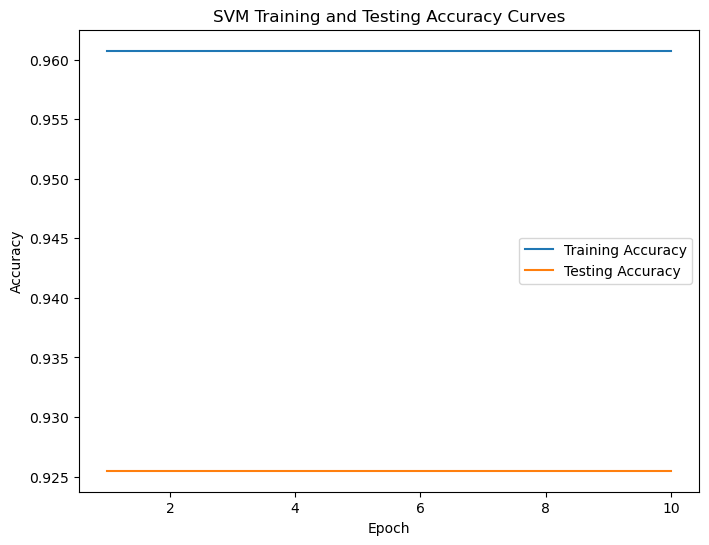

In [17]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame
X = df.drop("Spam", axis=1)
y = df["Spam"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the SVM model
svm_model = SVC(probability=True)

# Lists to store accuracy values
train_accuracy_list = []
test_accuracy_list = []

# Train the model for multiple epochs (adjust as needed)
epochs = 10
for epoch in range(epochs):
    # Fit the model
    svm_model.fit(X_train_scaled, y_train)

    # Make predictions on the training set
    y_train_pred = svm_model.predict(X_train_scaled)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracy_list.append(train_accuracy)

    # Make predictions on the test set
    y_test_pred = svm_model.predict(X_test_scaled)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracy_list.append(test_accuracy)

# Print and plot the accuracies
print("Final SVM Training Accuracy:", train_accuracy_list[-1])
print("Final SVM Testing Accuracy:", test_accuracy_list[-1])

# Plot training and testing accuracy curves
plt.figure(figsize=(8, 6))
plt.plot(range(1, epochs + 1), train_accuracy_list, label='Training Accuracy')
plt.plot(range(1, epochs + 1), test_accuracy_list, label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('SVM Training and Testing Accuracy Curves')
plt.legend()
plt.show()


Decision Tree Accuracy: 0.9176470588235294
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       147
           1       0.91      0.89      0.90       108

    accuracy                           0.92       255
   macro avg       0.92      0.91      0.92       255
weighted avg       0.92      0.92      0.92       255

Decision Tree Confusion Matrix:
 [[138   9]
 [ 12  96]]


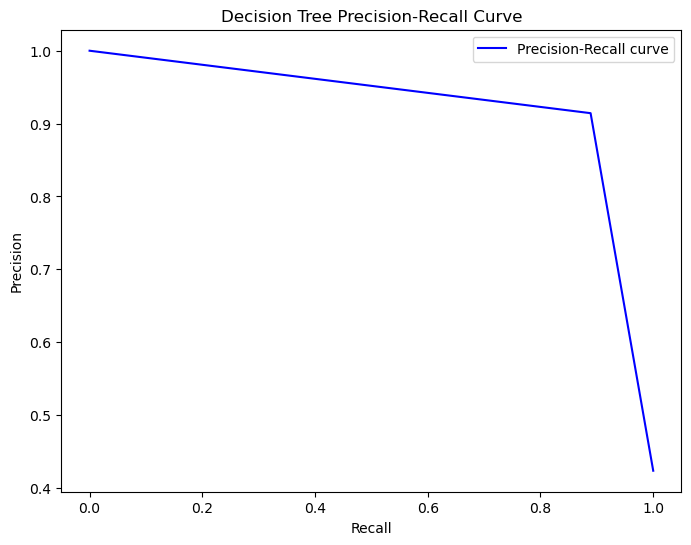

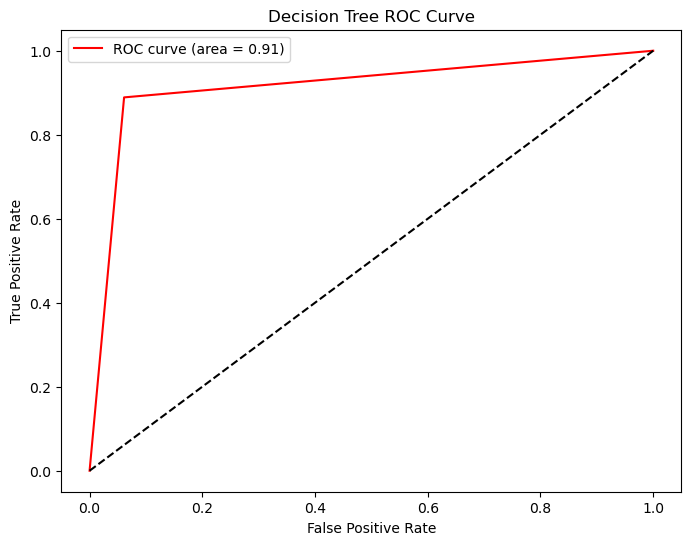

In [16]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test_scaled)
y_prob_dt = dt_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

print(f"Decision Tree Accuracy: {accuracy_dt}")
print("Decision Tree Classification Report:\n", report_dt)
print("Decision Tree Confusion Matrix:\n", conf_matrix_dt)

# Precision-Recall Curve
precision_dt, recall_dt, _ = precision_recall_curve(y_test, y_prob_dt)
plt.figure(figsize=(8, 6))
plt.plot(recall_dt, precision_dt, color='blue', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Decision Tree Precision-Recall Curve')
plt.legend()
plt.show()

# ROC Curve
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='red', label='ROC curve (area = {:.2f})'.format(roc_auc_dt))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.legend()
plt.show()


Final Decision Tree Training Accuracy: 0.9970559371933267
Final Decision Tree Testing Accuracy: 0.9058823529411765


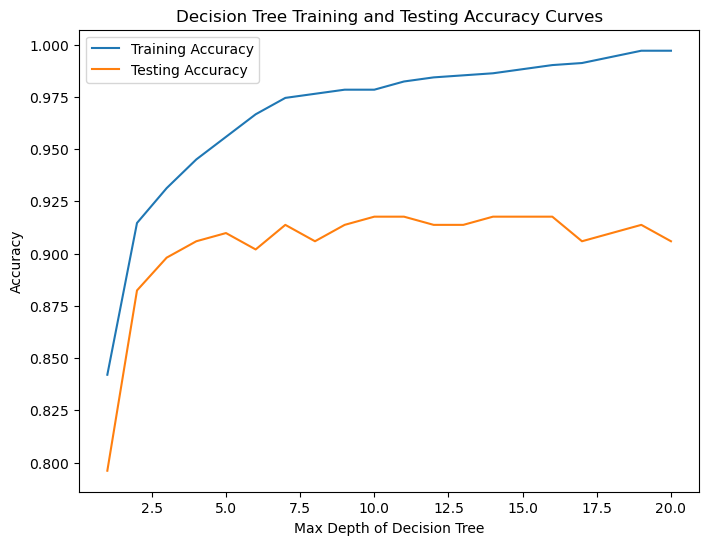

In [18]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_recall_curve, roc_curve, auc

# Assuming 'df' is your DataFrame
X = df.drop("Spam", axis=1)
y = df["Spam"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Lists to store accuracy values
train_accuracy_list = []
test_accuracy_list = []

# Vary the depth of the tree (adjust as needed)
max_depth_values = range(1, 21)
for max_depth in max_depth_values:
    # Set the max depth of the tree
    dt_model.set_params(max_depth=max_depth)

    # Fit the model
    dt_model.fit(X_train_scaled, y_train)

    # Make predictions on the training set
    y_train_pred = dt_model.predict(X_train_scaled)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracy_list.append(train_accuracy)

    # Make predictions on the test set
    y_test_pred = dt_model.predict(X_test_scaled)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracy_list.append(test_accuracy)

# Print and plot the accuracies
print("Final Decision Tree Training Accuracy:", train_accuracy_list[-1])
print("Final Decision Tree Testing Accuracy:", test_accuracy_list[-1])

# Plot training and testing accuracy curves
plt.figure(figsize=(8, 6))
plt.plot(max_depth_values, train_accuracy_list, label='Training Accuracy')
plt.plot(max_depth_values, test_accuracy_list, label='Testing Accuracy')
plt.xlabel('Max Depth of Decision Tree')
plt.ylabel('Accuracy')
plt.title('Decision Tree Training and Testing Accuracy Curves')
plt.legend()
plt.show()


Random Forest Accuracy: 0.9529411764705882
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       147
           1       0.97      0.92      0.94       108

    accuracy                           0.95       255
   macro avg       0.96      0.95      0.95       255
weighted avg       0.95      0.95      0.95       255

Random Forest Confusion Matrix:
 [[144   3]
 [  9  99]]


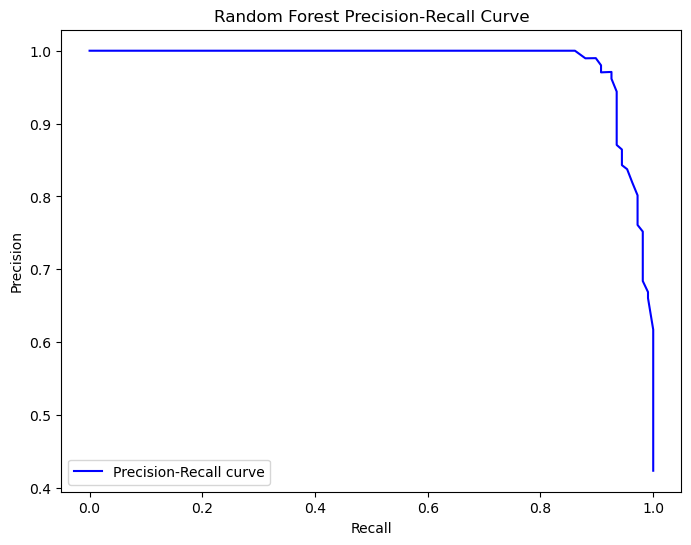

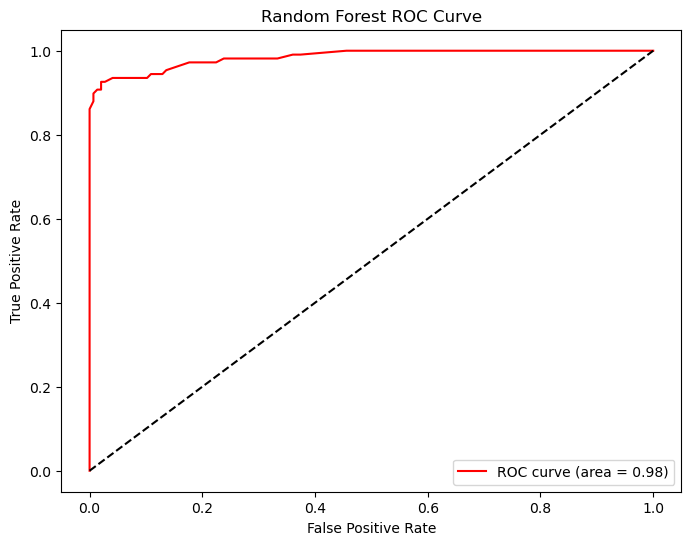

In [19]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_scaled)
y_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf}")
print("Random Forest Classification Report:\n", report_rf)
print("Random Forest Confusion Matrix:\n", conf_matrix_rf)

# Precision-Recall Curve
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_prob_rf)
plt.figure(figsize=(8, 6))
plt.plot(recall_rf, precision_rf, color='blue', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Random Forest Precision-Recall Curve')
plt.legend()
plt.show()

# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='red', label='ROC curve (area = {:.2f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend()
plt.show()


Final Random Forest Training Accuracy: 1.0
Final Random Forest Testing Accuracy: 0.9529411764705882


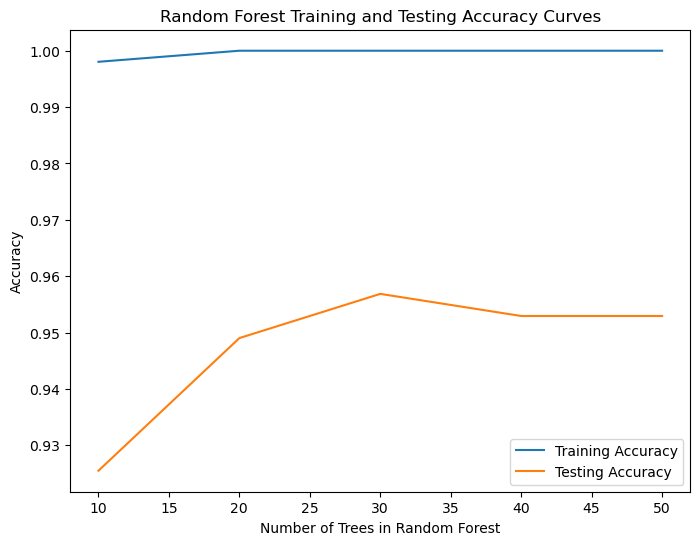

In [20]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_recall_curve, roc_curve, auc

# Assuming 'df' is your DataFrame
X = df.drop("Spam", axis=1)
y = df["Spam"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Lists to store accuracy values
train_accuracy_list = []
test_accuracy_list = []

# Vary the number of trees in the forest (adjust as needed)
n_estimators_values = [10, 20, 30, 40, 50]
for n_estimators in n_estimators_values:
    # Set the number of trees
    rf_model.set_params(n_estimators=n_estimators)

    # Fit the model
    rf_model.fit(X_train_scaled, y_train)

    # Make predictions on the training set
    y_train_pred = rf_model.predict(X_train_scaled)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracy_list.append(train_accuracy)

    # Make predictions on the test set
    y_test_pred = rf_model.predict(X_test_scaled)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracy_list.append(test_accuracy)

# Print and plot the accuracies
print("Final Random Forest Training Accuracy:", train_accuracy_list[-1])
print("Final Random Forest Testing Accuracy:", test_accuracy_list[-1])

# Plot training and testing accuracy curves
plt.figure(figsize=(8, 6))
plt.plot(n_estimators_values, train_accuracy_list, label='Training Accuracy')
plt.plot(n_estimators_values, test_accuracy_list, label='Testing Accuracy')
plt.xlabel('Number of Trees in Random Forest')
plt.ylabel('Accuracy')
plt.title('Random Forest Training and Testing Accuracy Curves')
plt.legend()
plt.show()


XGBoost Accuracy: 0.9607843137254902
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       147
           1       0.95      0.95      0.95       108

    accuracy                           0.96       255
   macro avg       0.96      0.96      0.96       255
weighted avg       0.96      0.96      0.96       255

XGBoost Confusion Matrix:
 [[142   5]
 [  5 103]]


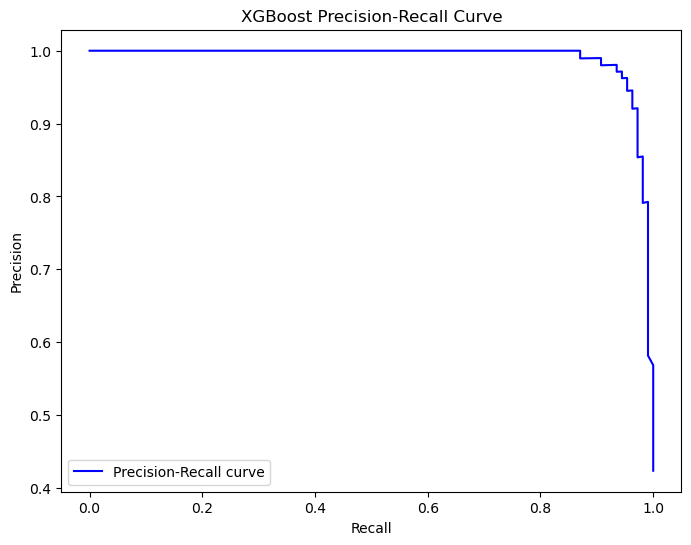

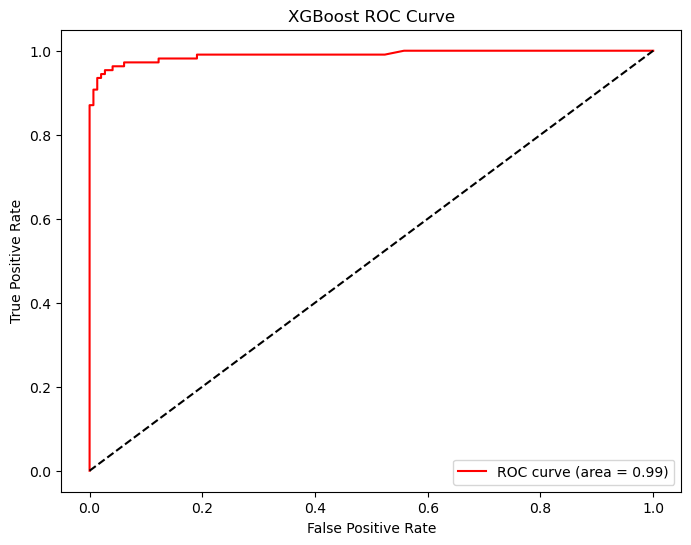

In [21]:
import xgboost as xgb

# Initialize and train the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test_scaled)
y_prob_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

print(f"XGBoost Accuracy: {accuracy_xgb}")
print("XGBoost Classification Report:\n", report_xgb)
print("XGBoost Confusion Matrix:\n", conf_matrix_xgb)

# Precision-Recall Curve
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_prob_xgb)
plt.figure(figsize=(8, 6))
plt.plot(recall_xgb, precision_xgb, color='blue', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('XGBoost Precision-Recall Curve')
plt.legend()
plt.show()

# ROC Curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='red', label='ROC curve (area = {:.2f})'.format(roc_auc_xgb))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve')
plt.legend()
plt.show()


Final XGBoost Training Accuracy: 0.9990186457311089
Final XGBoost Testing Accuracy: 0.9686274509803922


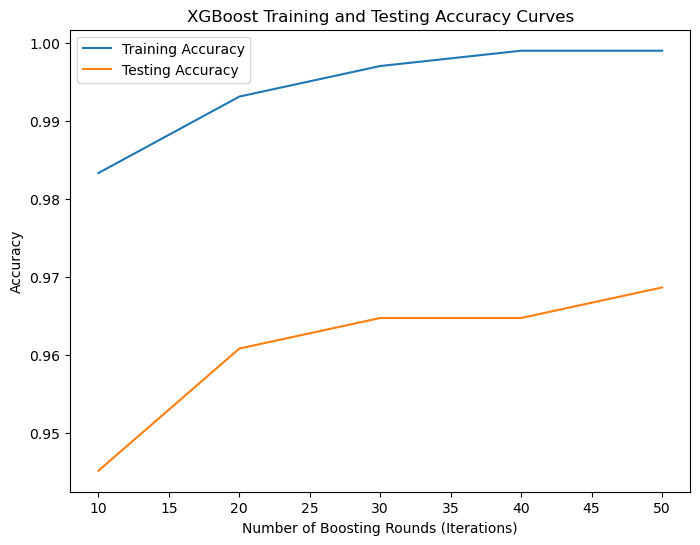

In [22]:
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_recall_curve, roc_curve, auc

# Assuming 'df' is your DataFrame
X = df.drop("Spam", axis=1)
y = df["Spam"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the data to DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train_scaled, label=y_train)
dtest = xgb.DMatrix(X_test_scaled, label=y_test)

# Parameters for XGBoost
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',  # you can use other evaluation metrics like 'error' for classification
    'random_state': 42
}

# Lists to store accuracy values
train_accuracy_list = []
test_accuracy_list = []

# Vary the number of boosting rounds (adjust as needed)
num_boost_round_values = [10, 20, 30, 40, 50]
for num_boost_round in num_boost_round_values:
    # Train the model
    xgb_model = xgb.train(params, dtrain, num_boost_round=num_boost_round, evals=[(dtrain, 'train'), (dtest, 'test')], early_stopping_rounds=10, verbose_eval=False)

    # Make predictions on the training set
    y_train_pred = xgb_model.predict(dtrain)
    y_train_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_train_pred]
    train_accuracy = accuracy_score(y_train, y_train_pred_binary)
    train_accuracy_list.append(train_accuracy)

    # Make predictions on the test set
    y_test_pred = xgb_model.predict(dtest)
    y_test_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_test_pred]
    test_accuracy = accuracy_score(y_test, y_test_pred_binary)
    test_accuracy_list.append(test_accuracy)

# Print and plot the accuracies
print("Final XGBoost Training Accuracy:", train_accuracy_list[-1])
print("Final XGBoost Testing Accuracy:", test_accuracy_list[-1])

# Plot training and testing accuracy curves
plt.figure(figsize=(8, 6))
plt.plot(num_boost_round_values, train_accuracy_list, label='Training Accuracy')
plt.plot(num_boost_round_values, test_accuracy_list, label='Testing Accuracy')
plt.xlabel('Number of Boosting Rounds (Iterations)')
plt.ylabel('Accuracy')
plt.title('XGBoost Training and Testing Accuracy Curves')
plt.legend()
plt.show()
